**Fashion MNIST using CNN**

As seen in the previous model using a basic neural network, the accuracy was coming around 88% which is low. The accuracy can be increased using a CNN (Convolutional Neural Network)

Importing the necessary libraries

In [2]:
#Various libraries for data handling, updation and visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report as report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical, plot_model
import warnings
warnings.filterwarnings('ignore')

Loading the data

In [3]:
#Using tensorflow to load the data
data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [4]:
#Storing the labels
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



Exploring the data

In [5]:
#Function to explore data
def FMNIST_data_info(train_images, test_images, train_labels, test_labels):
    print("Train images shape:", train_images.shape)
    print("Test images shape:", test_images.shape)
    print("Train labels:", train_labels)
    print("Test labels:", test_labels)

In [6]:
#Calling the function to see data info
FMNIST_data_info(train_images, test_images, train_labels, test_labels)

Train images shape: (60000, 28, 28)
Test images shape: (10000, 28, 28)
Train labels: [9 0 0 ... 3 0 5]
Test labels: [9 2 1 ... 8 1 5]


From above, the training set is of 60000 images having 28X28 dimension and test set is of 10000 images having 28X28 dimension

Plotting the last image of the training dataset

In [7]:
#Function to show last image
def show_image(image):
    plt.imshow(image, cmap='Greys')
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.show()

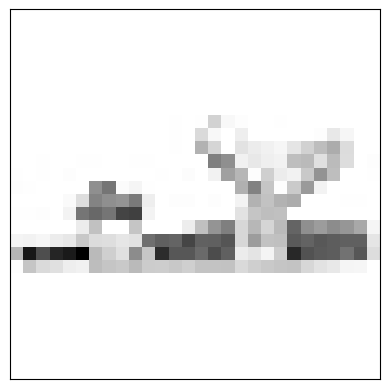

In [8]:
#Calling the function to plot image
show_image(train_images[59999])

Preprocessing of data

In [9]:
#Function for checking for null values of labels in test and train dataset as they can hamper with the results and cause redundancy
def count_null_values(labels):
    null_values = np.isnan(labels).sum()
    print("Null values:", null_values)

In [10]:
#Null values in Train_Labels
print("Null values in train_labels:")
count_null_values(train_labels)

#Null values in Test_Labels
print("Null values in test_labels:")
count_null_values(test_labels)

Null values in train_labels:
Null values: 0
Null values in test_labels:
Null values: 0


In [11]:
#Since there are no null values, we can carry on with the model

Building the model


In [12]:
#Function for scaling the values to prevent numerical instability, this will ensure that all values lie in [0,1]
def preprocess_images(images):
    processed_images = images.reshape(-1, 28, 28, 1) / 255.0
    return processed_images

In [13]:
#Scaling the values of training dataset
processed_train_images = preprocess_images(train_images)
#Scaling the values of testing dataset
processed_test_images = preprocess_images(test_images)

In [14]:
#Function for creating the model
def create_model():
    model = keras.Sequential([
        #Total 20 layers are there in this CNN model having multiple cn layer, dropout layers, dense layers and batch normalisation layers
        keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)), #Convolutional layer with 32 filters and a relu activation function
        keras.layers.BatchNormalization(), #Layer to normalise the batch
        keras.layers.Dropout(0.3), #Layer to stop 30% of the neurons randomly

        keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'), #Convolutional layer with 64 filters and a relu activation function
        keras.layers.MaxPooling2D(pool_size=(2, 2)),#Layer to normalise the batch
        keras.layers.Dropout(0.3),#Layer to stop 30% of the neurons randomly

        keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'), #Convolutional layer with 128 filters and a relu activation function
        keras.layers.BatchNormalization(),#Layer to normalise the batch
        keras.layers.Dropout(0.3),#Layer to stop 30% of the neurons randomly

        keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),  #Convolutional layer with 256 filters and a relu activation function
        keras.layers.BatchNormalization(),#Layer to normalise the batch
        keras.layers.Dropout(0.3),#Layer to stop 30% of the neurons randomly

        keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu'),  #Convolutional layer with 512 filters and a relu activation function
        keras.layers.BatchNormalization(),#Layer to normalise the batch
        keras.layers.Dropout(0.3),#Layer to stop 30% of the neurons randomly

        keras.layers.Flatten(), #Layer to flatten the 2d feature to 1d vector
        keras.layers.Dense(512, activation='relu'), #A fully connected layer with 512 neurons and a relu function
        keras.layers.BatchNormalization(),#Layer to normalise the batch
        keras.layers.Dropout(0.5),#Layer to stop 50% of the neurons randomly
        keras.layers.Dense(128, activation='relu'), #A fully connected layer with 128 neurons and a relu function
        keras.layers.BatchNormalization(),#Layer to normalise the batch
        keras.layers.Dropout(0.5),#Layer to stop 50% of the neurons randomly
        keras.layers.Dense(64, activation='relu'), #A fully connected layer with 64 neurons and a relu function
        keras.layers.BatchNormalization(),#Layer to normalise the batch
        keras.layers.Dropout(0.5),#Layer to stop 50% of the neurons randomly
        keras.layers.Dense(10, activation='softmax') #A fully connected layer with 10 neurons and a relu function to give the output labels
    ])

    return model


In [15]:
#Calling the function to create the CNN model
model=create_model()

In [16]:
#Compiling the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
# Learning Rate Schedule to improve optimisation
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=0)

In [18]:
# Fitting the model on training images labels and running the model for epochs=10
model.fit(train_images, train_labels, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 181s 96ms/step - loss: 0.7803 - accuracy: 0.7293
Epoch 2/10
1875/1875 [==============================] - 180s 96ms/step - loss: 0.4698 - accuracy: 0.8449
Epoch 3/10
1875/1875 [==============================] - 182s 97ms/step - loss: 0.4066 - accuracy: 0.8665
Epoch 4/10
1875/1875 [==============================] - 181s 97ms/step - loss: 0.3659 - accuracy: 0.8799
Epoch 5/10
1875/1875 [==============================] - 182s 97ms/step - loss: 0.3362 - accuracy: 0.8889
Epoch 6/10
1875/1875 [==============================] - 182s 97ms/step - loss: 0.3149 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 184s 98ms/step - loss: 0.2931 - accuracy: 0.9032
Epoch 8/10
1875/1875 [==============================] - 195s 104ms/step - loss: 0.2746 - accuracy: 0.9091
Epoch 9/10
1875/1875 [==============================] - 195s 104ms/step - loss: 0.2616 - accuracy: 0.9138
Epoch 10/10
1875/1875 [==============================

In [19]:
#Function for using the plot_model function to look at the layers of the model
def layers_of_model(model):
    model.build(input_shape=(None, 28, 28, 1))
    model.summary()
    plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

In [20]:
#Calling the function to look at the layers
layers_of_model(model)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 64)        0

In [21]:
#Storing predicted value in a variable
predictions = model.predict(test_images)
predicted_val = np.argmax(predictions, axis=1)

313/313 [==============================] - 4s 12ms/step


In [22]:
#Function to calculate test_accuracy and loss
def test_model(model, test_images, test_labels):
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    test_acc = test_acc * 100
    print('Test loss:', test_loss)
    print('Test accuracy in percentage:', test_acc)

In [23]:
# Calling the function for calculating test_accuracy
test_model(model, test_images, test_labels)

313/313 - 4s - loss: 0.2288 - accuracy: 0.9204 - 4s/epoch - 12ms/step
Test loss: 0.2288169413805008
Test accuracy in percentage: 92.04000234603882


In [24]:
#Building a confusion matrix and using seaborn's heatmap to show the confusion matrix
def create_confusion_matrix(model, test_images, test_labels):
    y_pred = np.argmax(model.predict(test_images), axis=-1)
    cm = confusion_matrix(test_labels, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()


313/313 [==============================] - 4s 12ms/step


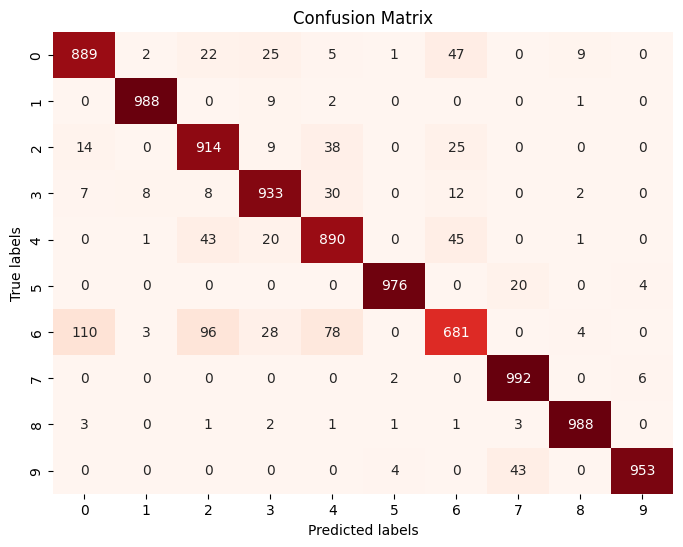

In [25]:
#Calling the function for generating the confusion matrix
create_confusion_matrix(model, test_images, test_labels)

In [26]:
#Function to create a classification report using sklearn
def print_classification_report(model, test_images, test_labels):
    y_pred = np.argmax(model.predict(test_images), axis=-1)
    classification_rep = report(test_labels, y_pred)
    print(classification_rep)


In [27]:
# Calling the function for generating the classification report
print_classification_report(model, test_images, test_labels)

313/313 [==============================] - 4s 12ms/step
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1000
           1       0.99      0.99      0.99      1000
           2       0.84      0.91      0.88      1000
           3       0.91      0.93      0.92      1000
           4       0.85      0.89      0.87      1000
           5       0.99      0.98      0.98      1000
           6       0.84      0.68      0.75      1000
           7       0.94      0.99      0.96      1000
           8       0.98      0.99      0.99      1000
           9       0.99      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [28]:
#Function for plotting Receiver Operating Characterstic Curve
def plot_roc_curve(model, test_images, test_labels):
    y_scores = model.predict(test_images)

    test_labels_bin = label_binarize(test_labels, classes=np.unique(test_labels))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = test_labels_bin.shape[1]
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(test_labels_bin[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])


    fpr["micro"], tpr["micro"], _ = roc_curve(test_labels_bin.ravel(), y_scores.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot ROC curve for each class
    plt.figure()
    lw = 2
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
             ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

313/313 [==============================] - 4s 12ms/step


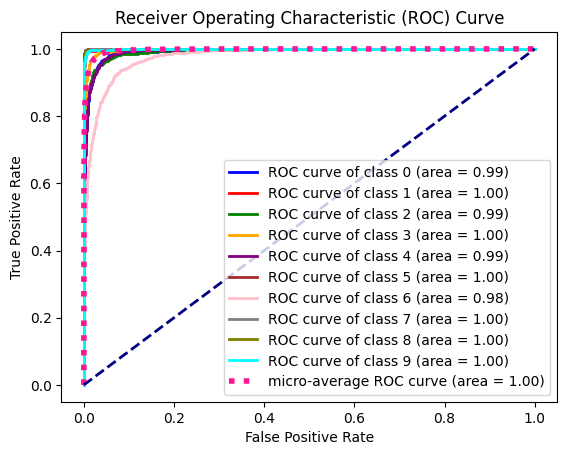

In [29]:
# Calling function for plotting roc curve
plot_roc_curve(model, test_images, test_labels)

In [30]:
#Function to calculate INtersection over union
def calculate_iou(test_labels, predicted_val):
    intersection = np.logical_and(test_labels,predicted_val)
    union = np.logical_or(test_labels, predicted_val)
    iou = np.sum(intersection) / np.sum(union)
    print("Intersection over Union is: ", iou)


In [32]:
#Calling function to get Intersection over Union value
calculate_iou(test_labels, predicted_val)

Intersection over Union is:  0.9731094281637581


In [33]:
model.save('model.h5')


In [34]:
import tensorflow as tf
model = tf.keras.models.load_model('model.h5')
tf.saved_model.save(model,'model')

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


In [41]:
from openvino.inference_engine import IECore
import time
import numpy as np

ie = IECore()

# Load the optimized model
optimized_model = ie.read_network(model="./saved_model.xml", weights="./saved_model.bin")
input_blob = next(iter(optimized_model.input_info))
optimized_model.reshape({input_blob: (1, 28, 28, 1)})

exec_net = ie.load_network(network=optimized_model, device_name="CPU")
#Setting the inference time to 0 and running the loop to calculate it
total_inference_time = 0
for input_data in test_images:
    input_data = input_data.reshape((1, 28, 28, 1))

    start = time.time()
    res = exec_net.infer(inputs={input_blob: input_data})
    end = time.time()
    inference_time = end - start
    total_inference_time += inference_time

average_inference_time = total_inference_time / len(test_images)

print("Total inference time for the Fashion MNIST dataset: {:.5f} seconds".format(total_inference_time))
print("Average inference time per image: {:.5f} seconds".format(average_inference_time))


Total inference time for the Fashion MNIST dataset: 11.98705 seconds
Average inference time per image: 0.00120 seconds
